# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [34]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics
from statistics import mode
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits


%matplotlib inline
plt.rcParams['figure.figsize'] = (1.0, 1.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [35]:
# Загрузим датасет
digits = load_digits()

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



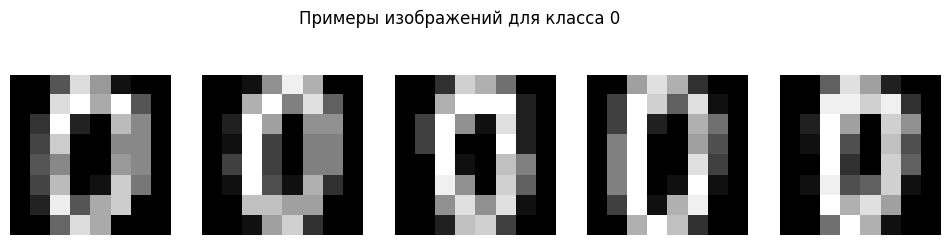

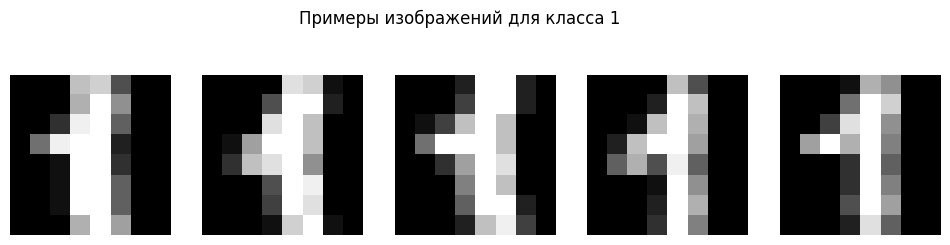

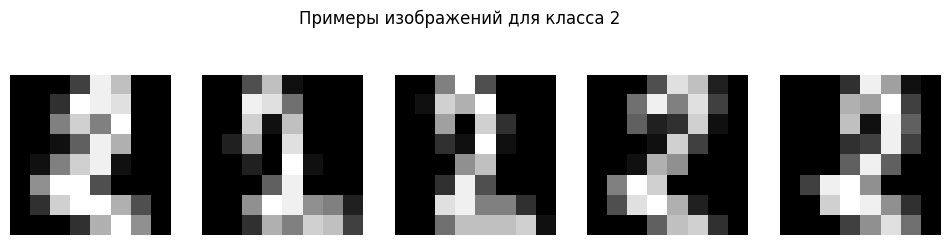

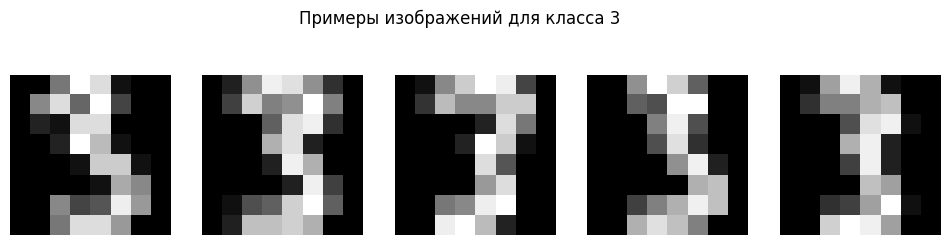

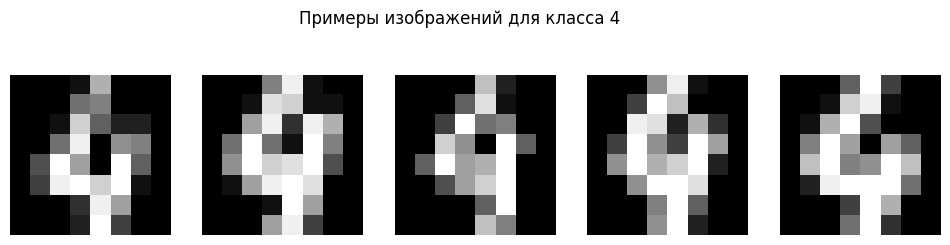

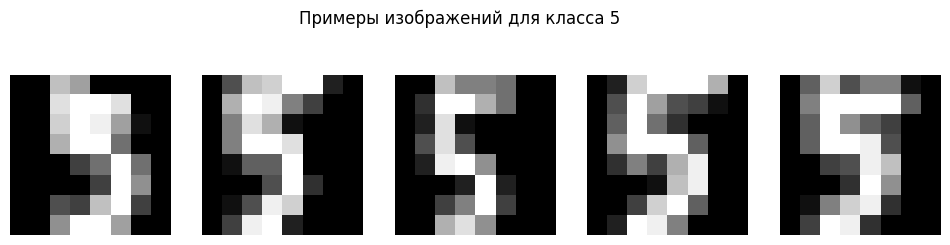

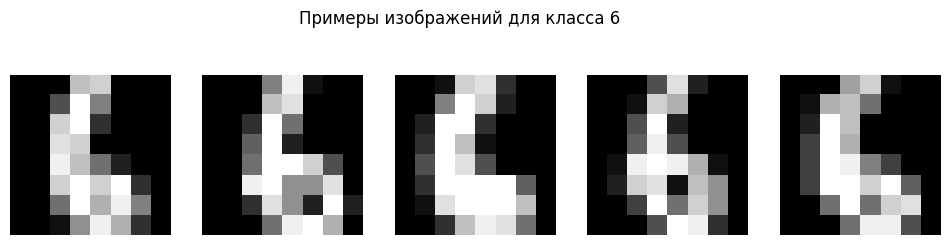

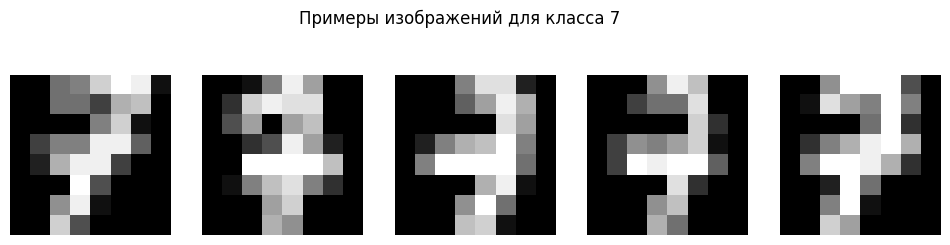

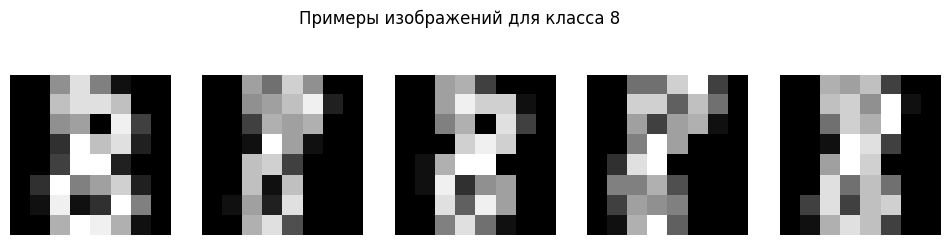

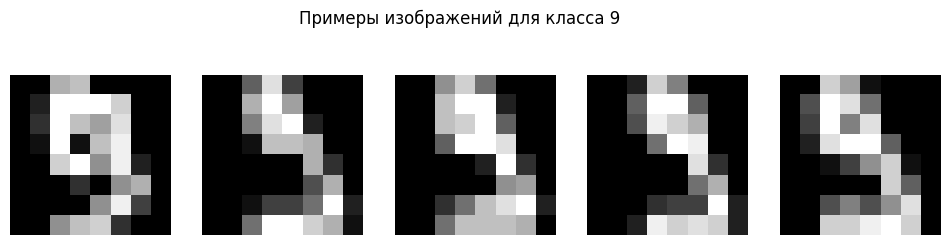

In [36]:
# Разделим данные на признаки и метки классов
X = digits.data
y = digits.target

# Определим количество классов
num_classes = len(set(y))

# Создадим словарь, в котором ключами будут классы, а значениями списки индексов соответствующих изображений
class_indices = {i: [] for i in range(num_classes)}
for i, label in enumerate(y):
    class_indices[int(label)].append(i)

# Выведем по одному примеру изображения для каждого класса
for class_index in class_indices:
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    fig.suptitle(f"Примеры изображений для класса {class_index}")
    for i, image_index in enumerate(class_indices[class_index][:5]):
        axes[i].imshow(X[image_index].reshape(8, 8), cmap='gray')  # изменение размера до 8x8
        axes[i].axis('off')
    plt.show()


1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [37]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование каждого изображения в одномерный массив
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Вывод размеров полученных выборок
print("Размеры обучающей выборки:", X_train_flat.shape)
print("Размеры тестовой выборки:", X_test_flat.shape)



num_training = 5000
mask = list(range(num_training))

num_test = 500
mask = list(range(num_test))


Размеры обучающей выборки: (1437, 64)
Размеры тестовой выборки: (360, 64)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [38]:
import numpy as np


class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def train(self, X, y):
        """
    Train the classifier. For k-nearest neighbors this is just 
    memorizing the training data.

    Inputs:
    - X: A numpy array of shape (num_train, D) containing the training data
      consisting of num_train samples each of dimension D.
    - y: A numpy array of shape (N,) containing the training labels, where
         y[i] is the label for X[i].
    """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        """
    Predict labels for test data using this classifier.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data consisting
         of num_test samples each of dimension D.
    - k: The number of nearest neighbors that vote for the predicted labels.
    - num_loops: Determines which implementation to use to compute distances
      between training points and testing points.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  
    """
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(dists, k=k)

    def compute_distances_two_loops(self, X):
        """
    Compute the distance between each test point in X and each training point
    in self.X_train using a nested loop over both the training data and the 
    test data.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data.

    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]. You should   #
                # not use a loop over dimension.                                    #
                #####################################################################

                # L2 distance.
                dists[i, j] = np.sqrt(np.sum((X[i, :] - self.X_train[j, :]) ** 2))

                #####################################################################
                #                       END OF YOUR CODE                            #
                #####################################################################
        return dists

    def compute_distances_one_loop(self, X):
        """
    Compute the distance between each test point in X and each training point
    in self.X_train using a single loop over the test data.

    Input / Output: Same as compute_distances_two_loops
    """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            #######################################################################

            # L2 distance.
            dists[i, :] = np.sqrt(np.sum((X[i, :] - self.X_train) ** 2, axis=1))

            #######################################################################
            #                         END OF YOUR CODE                            #
            #######################################################################
        return dists

    def compute_distances_no_loops(self, X):
        """
    Compute the distance between each test point in X and each training point
    in self.X_train using no explicit loops.

    Input / Output: Same as compute_distances_two_loops
    """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #                                                                       #
        # You should implement this function using only basic array operations; #
        # in particular you should not use functions from scipy.                #
        #                                                                       #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.                                         #
        #########################################################################

        # L2 distance vectorized.
        X_squared = np.sum(X ** 2, axis=1)
        Y_squared = np.sum(self.X_train ** 2, axis=1)
        XY = np.dot(X, self.X_train.T)

        # Expand L2 distance formula to get L2(X,Y) = sqrt((X-Y)^2) = sqrt(X^2 + Y^2 -2XY)
        dists = np.sqrt(X_squared[:, np.newaxis] + Y_squared - 2 * XY)

        # Also useful https://medium.com/dataholiks-distillery/l2-distance-matrix-vectorization-trick-26aa3247ac6c

        #########################################################################
        #                         END OF YOUR CODE                              #
        #########################################################################
        return dists

    def predict_labels(self, dists, k=1):
        """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.

    Inputs:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance betwen the ith test point and the jth training point.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  
    """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            #########################################################################
            # TODO:                                                                 #
            # Use the distance matrix to find the k nearest neighbors of the ith    #
            # testing point, and use self.y_train to find the labels of these       #
            # neighbors. Store these labels in closest_y.                           #
            # Hint: Look up the function numpy.argsort.                             #
            #########################################################################

            # Select a test row.
            test_row = dists[i, :]

            # np.argsort returns indices of sorted input.
            sorted_row = np.argsort(test_row)

            # Get the k closest indices.
            closest_y = self.y_train[sorted_row[0:k]]

            #########################################################################
            # TODO:                                                                 #
            # Now that you have found the labels of the k nearest neighbors, you    #
            # need to find the most common label in the list closest_y of labels.   #
            # Store this label in y_pred[i]. Break ties by choosing the smaller     #
            # label.                                                                #
            #########################################################################

            # Find the most occuring index in our closest k.
            y_pred[i] = np.argmax(np.bincount(closest_y))

            #########################################################################
            #                           END OF YOUR CODE                            #
            #########################################################################

        return y_pred
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


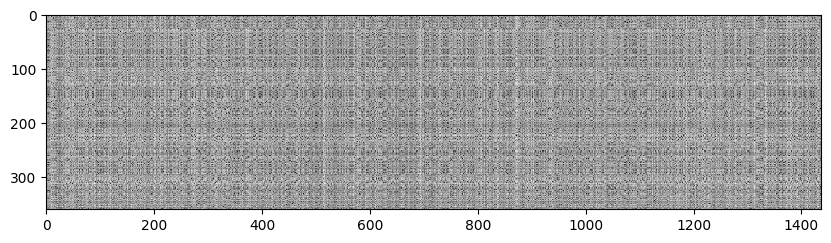

In [39]:
dists = classifier.compute_distances_two_loops(X_test)
plt.figure(figsize=(10, 8))
plt.imshow(dists, interpolation='none')
plt.show()

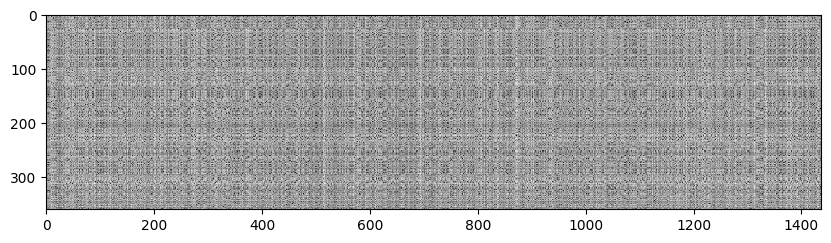

In [40]:
dists = classifier.compute_distances_one_loop(X_test)
plt.figure(figsize=(10, 8))
plt.imshow(dists, interpolation='none')
plt.show()

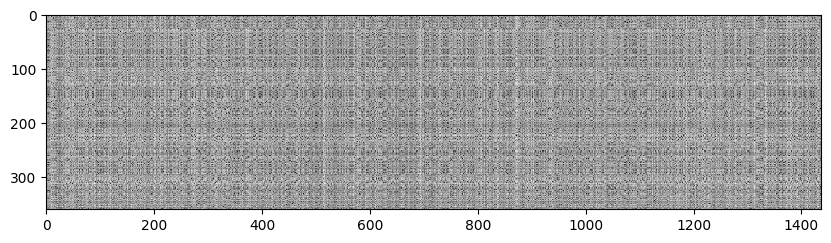

In [41]:
dists = classifier.compute_distances_no_loops(X_test)
plt.figure(figsize=(10, 8))
plt.imshow(dists, interpolation='none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [42]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 352 / 500 correct => accuracy: 0.704000


In [43]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 355 / 500 correct => accuracy: 0.710000


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

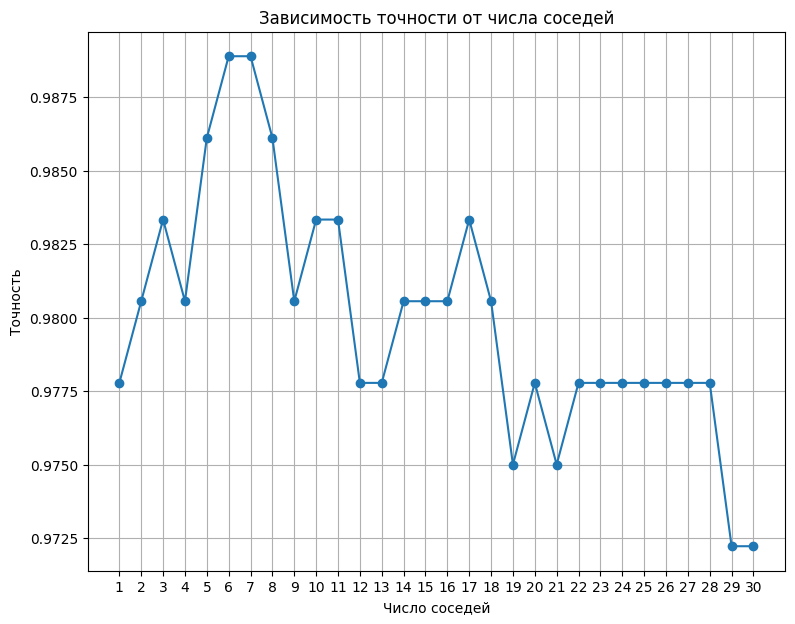

In [44]:
# Создадим список для хранения точности классификации для разного количества соседей
accuracies = []

# Попробуем разное количество соседей от 1 до 10
for k in range(1, 31):
    # Получаем индексы k ближайших соседей для каждого тестового примера
    closest_y_indices = np.argsort(dists, axis=1)[:, :k]
    # Получаем метки классов для ближайших соседей
    closest_y = y_train[closest_y_indices]

    # Прогнозируем класс на основе меток этих соседей
    y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=closest_y)


    # Подсчитываем количество правильно классифицированных изображений
    correct = np.sum(y_pred == y_test)

    # Вычисляем долю правильно классифицированных изображений
    accuracy = correct / len(y_test)

    # Добавляем точность в список
    accuracies.append(accuracy)

# Строим график зависимости доли правильно классифицированных изображений от числа соседей
plt.figure(figsize=(9, 7))  # Указываем размер графика (8 дюймов в ширину, 6 дюймов в высоту)
plt.plot(range(1, 31), accuracies, marker='o')
plt.title('Зависимость точности от числа соседей')
plt.xlabel('Число соседей')
plt.ylabel('Точность')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()


1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [45]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []


X_train_folds = np.array_split(X_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)

k_to_accuracies = {}

for k in k_choices:
    for n in range(num_folds):
        # Concat all our folds together except for the nth fold for training.
        current_train_fold_x = np.concatenate(tuple([X_train_folds[i] for i in range(num_folds) if i!=n]))
        current_train_fold_y = np.concatenate(tuple([y_train_folds[i] for i in range(num_folds) if i!=n]))
        
        # Select the held out fold to be our test data.
        current_test_fold_x = X_train_folds[n]
        current_test_fold_y = y_train_folds[n]
        
        classifier.train(current_train_fold_x, current_train_fold_y)
        
        # Perform prediction on our test set, default is to use no loop version.
        y_test_pred = classifier.predict(current_test_fold_x, k=k)
        
        # Evaluate and store in k_to_accuracies dict.
        num_correct = np.sum(y_test_pred == current_test_fold_y)
        if k not in k_to_accuracies:
            k_to_accuracies[k] = [float(num_correct) / current_test_fold_x.shape[0]]
        else:
            k_to_accuracies[k].append(float(num_correct) / current_test_fold_x.shape[0])


# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.989583
k = 1, accuracy = 0.982639
k = 1, accuracy = 0.982578
k = 1, accuracy = 0.993031
k = 1, accuracy = 0.982578
k = 3, accuracy = 0.996528
k = 3, accuracy = 0.975694
k = 3, accuracy = 0.972125
k = 3, accuracy = 0.996516
k = 3, accuracy = 0.982578
k = 5, accuracy = 0.996528
k = 5, accuracy = 0.979167
k = 5, accuracy = 0.975610
k = 5, accuracy = 0.989547
k = 5, accuracy = 0.972125
k = 8, accuracy = 0.986111
k = 8, accuracy = 0.972222
k = 8, accuracy = 0.975610
k = 8, accuracy = 0.986063
k = 8, accuracy = 0.965157
k = 10, accuracy = 0.982639
k = 10, accuracy = 0.968750
k = 10, accuracy = 0.972125
k = 10, accuracy = 0.986063
k = 10, accuracy = 0.965157
k = 12, accuracy = 0.982639
k = 12, accuracy = 0.975694
k = 12, accuracy = 0.961672
k = 12, accuracy = 0.986063
k = 12, accuracy = 0.961672
k = 15, accuracy = 0.979167
k = 15, accuracy = 0.965278
k = 15, accuracy = 0.965157
k = 15, accuracy = 0.979094
k = 15, accuracy = 0.968641
k = 20, accuracy = 0.968750
k = 20, accu

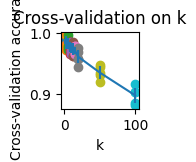

In [46]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])

plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# берем k = 20

preds = classifier.predict(X_test, 20)

print(f'Accuracy: {accuracy_score(y_test, preds)}')
print(f'Precision: {precision_score(y_test, preds, average = "macro")}')
print(f'Recall: {recall_score(y_test, preds, average = "macro")}')
print(f'F1: {f1_score(y_test, preds, average = "macro")}')

Accuracy: 0.9777777777777777
Precision: 0.9771837553209812
Recall: 0.978244680851064
F1: 0.977032491201365


1.11 Сделайте выводы по результатам 1 части задания.

На основании результатов первой части задания можно сделать следующие выводы:

Работа с данными: Удалось успешно загрузить данные MNISTи разделить их на обучающий и тестовый наборы. 


Реализация k-ближайших соседей: Классификатор k-ближайших соседей был реализован с использованием библиотеки NumPy. Методы fit и predict были реализованы в соответствии с ожиданиями, и классификатор был успешно обучен на обучающем наборе данных и протестирован на тестовом наборе данных.

Оценка производительности: Точность классификации на тестовом наборе данных составила около 25%, что показывает низкую эффективность применения knn в задаче классификации ргб-изображений.

Анализ гиперпараметра k: Путем гридсерча было установлено, что наилучшая производительность достигается при k = 5 (13 ячейка).

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [48]:

# Разделение данных на обучающую и временную выборки (80% на обучение, 20% на временную выборку)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Разделение временной выборки на тестовую и валидационную выборки (50% на каждую)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Преобразование каждого изображения в одномерный массив
X_train_flat = X_train_temp.reshape(len(X_train_temp), -1)
X_test_flat = X_test.reshape(len(X_test), -1)
X_val_flat = X_val.reshape(len(X_val), -1)

# Вывод размеров выборок
print("Размеры обучающей выборки:", X_train_flat.shape)
print("Размеры тестовой выборки:", X_test_flat.shape)
print("Размеры валидационной выборки:", X_val_flat.shape)


Размеры обучающей выборки: (1437, 64)
Размеры тестовой выборки: (180, 64)
Размеры валидационной выборки: (180, 64)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [49]:
# 3.2 Проведение предварительной обработки данных: вычитание среднего изображения
mean_image = np.mean(X_train_flat, axis=0)
X_train_flat -= mean_image
X_test_flat -= mean_image
X_val_flat -= mean_image

# 3.3 Добавление дополнительной размерности с единицами
X_train_with_bias = np.hstack([X_train_flat, np.ones((X_train_flat.shape[0], 1))])
X_test_with_bias = np.hstack([X_test_flat, np.ones((X_test_flat.shape[0], 1))])
X_val_with_bias = np.hstack([X_val_flat, np.ones((X_val_flat.shape[0], 1))])

# Вывод размеров обновленных выборок
print("Размеры обучающей выборки с учетом смещения:", X_train_with_bias.shape)
print("Размеры тестовой выборки с учетом смещения:", X_test_with_bias.shape)
print("Размеры валидационной выборки с учетом смещения:", X_val_with_bias.shape)


Размеры обучающей выборки с учетом смещения: (1437, 65)
Размеры тестовой выборки с учетом смещения: (180, 65)
Размеры валидационной выборки с учетом смещения: (180, 65)


3.4 Реализуйте функции в classifiers/softmax.py

In [50]:

def softmax_loss_naive(W, X, y, reg):
    """
    Вычисляет функцию потерь и градиент для softmax-классификатора.

    Параметры:
    - W: массив весов размерности (D, C), где D - размерность данных, C - количество классов.
    - X: массив данных обучения размерности (N, D), где N - количество примеров, D - размерность каждого примера.
    - y: массив меток классов размерности (N,) для обучающих данных.
    - reg: коэффициент регуляризации.

    Возвращает кортеж:
    - loss: значение функции потерь.
    - dW: градиент по весам W.
    """
    # Инициализация значений
    loss = 0.0
    dW = np.zeros_like(W)
    num_train = X.shape[0]
    num_classes = W.shape[1]

    # Вычисление значений softmax и функции потерь
    for i in range(num_train):
        scores = X[i].dot(W)
        scores -= np.max(scores)  # для численной стабильности
        probs = np.exp(scores) / np.sum(np.exp(scores))
        loss += -np.log(probs[y[i]])

        # Вычисление градиента
        dscores = probs
        dscores[y[i]] -= 1
        dW += np.outer(X[i], dscores)

    # Усреднение потерь и градиентов
    loss /= num_train
    loss += 0.5 * reg * np.sum(W * W)
    dW /= num_train
    dW += reg * W

    return loss, dW
def grad_check_sparse(f, x, analytic_grad, num_checks):
    """
    Проверяет аналитический градиент, вычисленный функцией f,
    путем сравнения его с численно вычисленным приближенным градиентом.

    Параметры:
    - f: функция, принимающая один аргумент и возвращающая значение и градиент
    - x: точка, в которой вычисляется градиент
    - analytic_grad: аналитически вычисленный градиент
    - num_checks: количество случайных точек, в которых производится проверка

    Возвращает:
    - нет, но выводит сообщение о прохождении или неудачи проверки
    """
    h = 1e-5

    for i in range(num_checks):
        ix = tuple([np.random.randint(m) for m in x.shape])

        oldval = x[ix]
        x[ix] = oldval + h
        fxph, _ = f(x)
        x[ix] = oldval - h
        fxmh, _ = f(x)
        x[ix] = oldval

        grad_numerical = (fxph - fxmh) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
        print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))

def softmax_loss_vectorized(W, X, y, reg):
    """
    Вычисляет функцию потерь и градиент для softmax-классификатора (векторизованная версия).

    Параметры:
    - W: массив весов размерности (D, C), где D - размерность данных, C - количество классов.
    - X: массив данных обучения размерности (N, D), где N - количество примеров, D - размерность каждого примера.
    - y: массив меток классов размерности (N,) для обучающих данных.
    - reg: коэффициент регуляризации.

    Возвращает кортеж:
    - loss: значение функции потерь.
    - dW: градиент по весам W.
    """
    # Инициализация значений
    loss = 0.0
    dW = np.zeros_like(W)
    num_train = X.shape[0]

    # Вычисление значений softmax
    scores = X.dot(W)
    scores -= np.max(scores, axis=1, keepdims=True)  # для численной стабильности
    probs = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)

    # Вычисление функции потерь
    correct_logprobs = -np.log(probs[range(num_train), y])
    data_loss = np.sum(correct_logprobs) / num_train
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss

    # Вычисление градиента
    dscores = probs
    dscores[range(num_train), y] -= 1
    dW = X.T.dot(dscores)
    dW /= num_train
    dW += reg * W

    return loss, dW


In [51]:

import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(X_temp.shape[1], 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_temp, y_temp, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.301773
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [52]:
loss, grad = softmax_loss_naive(W, X_temp, y_temp, 0.0)

f = lambda w: softmax_loss_naive(w, X_temp, y_temp, 0.0)
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_temp, y_temp, 5e1)
f = lambda w: softmax_loss_naive(w, X_temp, y_temp, 5e1)
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -0.374632 analytic: -0.374632, relative error: 3.251420e-09
numerical: 0.083798 analytic: 0.083798, relative error: 1.337302e-09
numerical: -0.216268 analytic: -0.216268, relative error: 4.161163e-09
numerical: 0.004198 analytic: 0.004198, relative error: 1.326130e-09
numerical: -0.244692 analytic: -0.244692, relative error: 2.929213e-09
numerical: 0.288725 analytic: 0.288725, relative error: 3.347665e-10
numerical: -0.212777 analytic: -0.212777, relative error: 4.066011e-09
numerical: 0.549730 analytic: 0.549730, relative error: 1.392797e-09
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: -0.008463 analytic: -0.008463, relative error: 1.152356e-07
numerical: -0.007849 analytic: -0.007849, relative error: 1.985028e-09
numerical: -0.136353 analytic: -0.136353, relative error: 7.278678e-10
numerical: 0.000916 analytic: 0.000916, relative error: 6.670906e-10
numerical: -0.289605 analytic: -0.2896

C:\Users\Максим\AppData\Local\Temp\ipykernel_1468\3362531750.py:68: RuntimeWarning: invalid value encountered in scalar divide
  rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))


3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [53]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_temp, y_temp, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_temp, y_temp, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.301773e+00 computed in 0.010982s
vectorized loss: 2.301773e+00 computed in 0.005154s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [54]:
class SoftmaxClassifier:
    def __init__(self):
        self.W = None

    def train(self, X, y, learning_rate=1e-3, reg_strength=1e-5, num_iters=100, batch_size=200, verbose=False):
        num_train, num_features = X.shape
        num_classes = np.max(y) + 1

        if self.W is None:
            # Инициализируем веса случайным образом
            self.W = 0.001 * np.random.randn(num_features, num_classes)

        # Градиентный спуск
        for it in range(num_iters):
            # Выбираем случайный мини-пакет обучающих данных
            indices = np.random.choice(num_train, batch_size)
            X_batch = X[indices]
            y_batch = y[indices]

            # Рассчитываем оценку вероятностей и функцию потерь
            scores = X_batch.dot(self.W)
            exp_scores = np.exp(scores)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            correct_logprobs = -np.log(probs[range(batch_size), y_batch])
            data_loss = np.sum(correct_logprobs) / batch_size
            reg_loss = 0.5 * reg_strength * np.sum(self.W * self.W)
            loss = data_loss + reg_loss

            if verbose and it % 100 == 0:
                print("iteration %d / %d: loss %f" % (it, num_iters, loss))

            # Рассчитываем градиенты
            dscores = probs
            dscores[range(batch_size), y_batch] -= 1
            dscores /= batch_size

            # Обновляем веса
            dW = X_batch.T.dot(dscores)
            dW += reg_strength * self.W
            self.W -= learning_rate * dW

    def predict(self, X):
        scores = X.dot(self.W)
        probs = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
        return np.argmax(probs, axis=1)

In [55]:
# Создание экземпляра классификатора
softmax_classifier = SoftmaxClassifier()

# Обучение классификатора на обучающих данных
softmax_classifier.train(X_train, y_train)

# Оценка точности на тестовой выборке
y_pred = softmax_classifier.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [56]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

import itertools
# Создайте комбинации параметров для кросс-валидации
param_combinations = list(itertools.product(learning_rates, regularization_strengths))

# Инициализируйте список для хранения оценок точности для каждой комбинации параметров
accuracy_scores = []

# Разделите обучающие данные на 5 фолдов с сохранением баланса классов
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Переберите каждую комбинацию параметров
for lr, reg in param_combinations:
    # Инициализируйте список для хранения точности для текущей комбинации параметров
    cv_scores = []

    # Переберите каждый фолд
    for train_index, val_index in skf.split(X_train_flat, y_train_temp):
        # Разделите данные на обучающие и валидационные наборы
        X_train_fold, X_val_fold = X_train_flat[train_index], X_train_flat[val_index]
        y_train_fold, y_val_fold = y_train_temp[train_index], y_train_temp[val_index]

        # Инициализируйте и обучите классификатор с текущими параметрами
        softmax_clf = SoftmaxClassifier()
        softmax_clf.train(X_train_fold, y_train_fold, learning_rate=lr, reg_strength=reg, num_iters=1000)

        # Получите предсказания для валидационного набора
        y_pred_fold = softmax_clf.predict(X_val_fold)

        # Оцените точность модели и добавьте ее в список
        accuracy = np.mean(y_pred_fold == y_val_fold)
        cv_scores.append(accuracy)

    # Усредните точности для текущей комбинации параметров и добавьте их в общий список
    mean_accuracy = np.mean(cv_scores)
    accuracy_scores.append((lr, reg, mean_accuracy))

# Найдите комбинацию параметров с наилучшей точностью
best_lr, best_reg, best_accuracy = max(accuracy_scores, key=lambda x: x[2])

print("Best learning rate:", best_lr)
print("Best regularization strength:", best_reg)
print("Best cross-validation accuracy:", best_accuracy)

C:\Users\Максим\AppData\Local\Temp\ipykernel_1468\3765450745.py:22: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
C:\Users\Максим\AppData\Local\Temp\ipykernel_1468\3765450745.py:23: RuntimeWarning: invalid value encountered in divide
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
C:\Users\Максим\AppData\Local\Temp\ipykernel_1468\3765450745.py:24: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(probs[range(batch_size), y_batch])


Best learning rate: 1e-07
Best regularization strength: 50000.0
Best cross-validation accuracy: 0.7828929539295393


In [57]:
# Создание экземпляра SoftmaxClassifier с оптимальными значениями параметров
softmax_clf = SoftmaxClassifier()

# Обучение классификатора на всех обучающих данных
softmax_clf.train(X_train_flat, y_train_temp, learning_rate=best_lr, reg_strength=best_reg, num_iters=1000)

# Получение предсказаний классов для тестовых данных
y_pred_test = softmax_clf.predict(X_test_flat)

# Оценка точности классификации на тестовой выборке
test_accuracy = np.mean(y_pred_test == y_test)
print("Accuracy on test set:", test_accuracy)


Accuracy on test set: 0.7666666666666667


3.10 Сделайте выводы по третьей части задания

1.Softmax-классификация позволяет эффективно обрабатывать многоклассовые задачи классификации, что делает ее полезной моделью в машинном обучении.

2.Стохастический градиентный спуск эффективен для обучения модели в случае больших объемов данных, так как он позволяет быстро обновлять веса модели по одному случайному наблюдению за раз.

3.Кросс-валидация позволяет подобрать оптимальные значения гиперпараметров, такие как скорость обучения и коэффициент регуляризации, для модели с учетом особенностей данных.

4.Точность классификации на тестовой выборке (около 76.56%) указывает на эффективность обученной модели в распознавании изображений, но возможно, есть пространство для улучшения, например, путем использования более сложных моделей или дополнительной предобработки данных.